Example 4.2: Jack’s Car Rental problem

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 9)

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

from rl import Environment, DPAgent
from jacks import JacksRentalEnv

In [2]:
# These are the numbers described in the book

# max_car = 20
# env = JacksRentalEnv(
#     mu_in0 = 3, # at location 0
#     mu_in1 = 2, # at location 1
#     mu_out0 = 3,
#     mu_out1 = 4,

#     income_per_car=10,
#     cost_per_car_transfer=-2,
#     max_car=max_car,
#     max_transfer=5
# )

I used smaller numbers than the book for faster iteration, which is described here http://web.engr.oregonstate.edu/~tgd/classes/539-old/programs/program1.html

In [3]:
max_car = 10
max_transfer = 3

# env0 is symmetrical, so the final value function should be symmetrical, too
env0 = JacksRentalEnv(
    mu_in0 = 2, # at location 1
    mu_in1 = 2, # at location 2
    mu_out0 = 3,
    mu_out1 = 3,

    income_per_car=10,
    cost_per_car_transfer=-2,
    max_car=max_car,
    max_transfer=max_transfer
)

# env1 has higer mu_in0 compared to env0, so the state with highest value is expected
# to shift to the lower end along the axis of Location 1
env1 = JacksRentalEnv(
    mu_in0 = 3, # at location 1
    mu_in1 = 2, # at location 2
    mu_out0 = 3,
    mu_out1 = 3,

    income_per_car=10,
    cost_per_car_transfer=-2,
    max_car=max_car,
    max_transfer=max_transfer
)

# env2 has higer mu_out1 compared to env1, so the state with highest value is expected
# to shift to the higher end along the axis of Location 2
env2 = JacksRentalEnv(
    mu_in0 = 3, # at location 0
    mu_in1 = 2, # at location 1
    mu_out0 = 3,
    mu_out1 = 4,

    income_per_car=10,
    cost_per_car_transfer=-2,
    max_car=max_car,
    max_transfer=max_transfer
)

In [4]:
agent0 = DPAgent(env0)
agent1 = DPAgent(env1)
agent2 = DPAgent(env2)
agents = [agent0, agent1, agent2]
for a in agents:
    print('training {0}'.format(a))
    for i in range(20):
        a.evaluate_policy()
        a.update_policy()

training <rl.DPAgent object at 0x10653bbe0>
training <rl.DPAgent object at 0x10653be10>
training <rl.DPAgent object at 0x10653be80>


#### Visualize value function

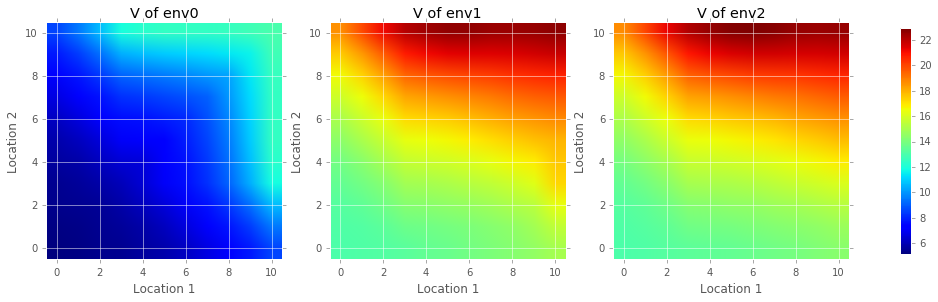

In [5]:
all_vals = np.concatenate([_.V for _ in agents])

fig, axes = plt.subplots(1, 3, figsize=(18, 9))
for k, (agent, ax) in enumerate(zip(agents, axes)):
    V = agent.V.reshape(max_car + 1, max_car + 1)
    im = ax.imshow(V, vmin=all_vals.min(), vmax=all_vals.max())
    ax.invert_yaxis()
    ax.set_title('V of env{0}'.format(k))
    ax.set_xlabel('Location 1')
    ax.set_ylabel('Location 2')

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.45)

see comments when env[0-2] are defined for the comparison

#### Visualize policy

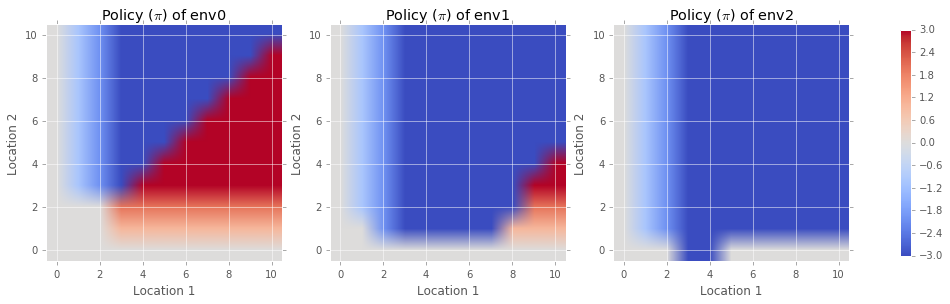

In [6]:
all_vals = np.concatenate([_.pi for _ in agents])
vmin = all_vals.min() - max_transfer
vmax = all_vals.max() - max_transfer

fig, axes = plt.subplots(1, 3, figsize=(18, 9))
for k, (agent, ax) in enumerate(zip(agents, axes)):
    pi = agent.pi.reshape(max_car + 1, max_car + 1)
    pi = pi - max_transfer # for easier visualization
    im = ax.imshow(pi, vmin=vmin, vmax=vmax, cmap=cm.coolwarm)
    ax.invert_yaxis()
    ax.set_title('Policy ($\pi$) of env{0}'.format(k))
    ax.set_xlabel('Location 1')
    ax.set_ylabel('Location 2')

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.45)

* env1 has higer mu_in0 compared to env0, so it encourages moving cars out of Location 1
* env2 has higer mu_out1 compared to env1, not sure why is there a hole at (4, 0)?

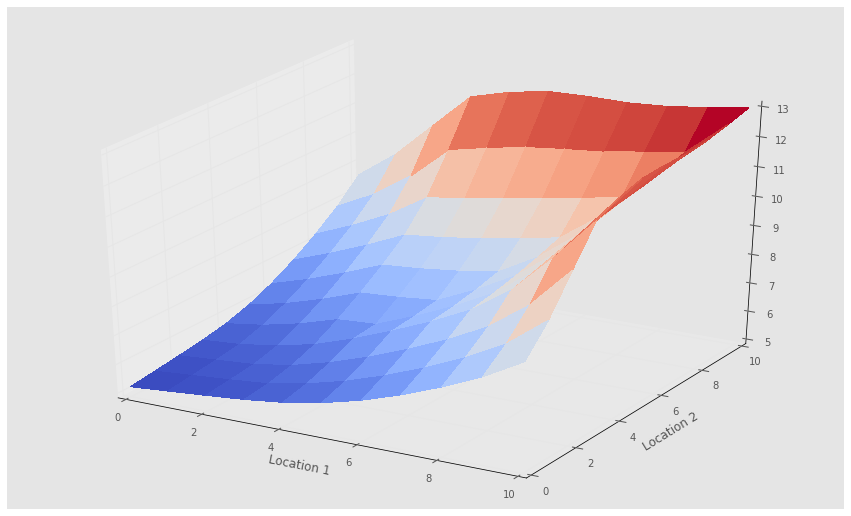

In [7]:
# 3D fancy plot if wanted

V = agent0.V.reshape(max_car + 1, max_car + 1)

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(0, V.shape[0], 1)
Y = np.arange(0, V.shape[1], 1)
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X, Y, V, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('Location 1')
ax.set_ylabel('Location 2')